<a href="https://colab.research.google.com/github/Nathan2605/TimeSeriesForecasting/blob/main/time_serie_forecasting_(arima)_4geeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#time series forecasting tools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

#arima
#!pip install pmdarima==2.0.3
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

###data

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
df = pd.read_csv(url)
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
#transformar cadena de fecha a objeto Datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')
df = df.set_index("date")
ts = df["sales"]
ts.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


###analisis

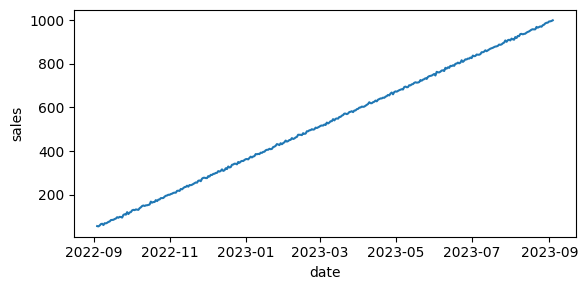

In [4]:
#graficar serie temporal
fig, axis = plt.subplots(figsize = (6, 3))
sns.lineplot(data = ts)
plt.tight_layout()
plt.show()

In [5]:
#descomposicion de la serie
decomposition = seasonal_decompose(ts, period = 12)
decomposition

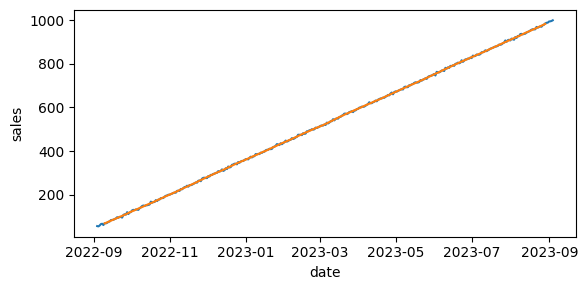

In [6]:
#tendencia
trend = decomposition.trend

#grafica
fig, axis = plt.subplots(figsize = (6, 3))
sns.lineplot(data = ts)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

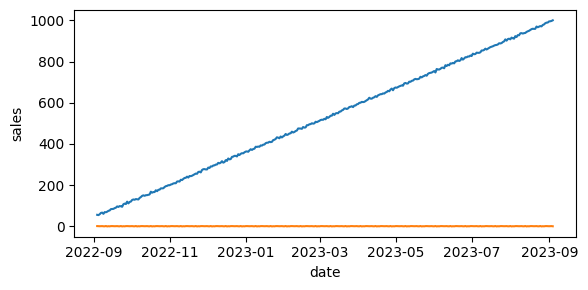

In [7]:
#estacionalidad
seasonal = decomposition.seasonal

#grafica
fig, axis = plt.subplots(figsize = (6, 3))
sns.lineplot(data = ts)
sns.lineplot(data = seasonal)
plt.tight_layout()
plt.show()

In [8]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [9]:
#prueba de Dickey-Fuller - estacionalidad
test_stationarity(ts) #no estacionaria

Resultados de la prueba de Dickey-Fuller:


,0
Test Statistic,0.545414
p-value,0.986190
#Lags Used,13.000000
Number of Observations Used,352.000000
Critical Value (1%),-3.449065
Critical Value (5%),-2.869786
Critical Value (10%),-2.571163


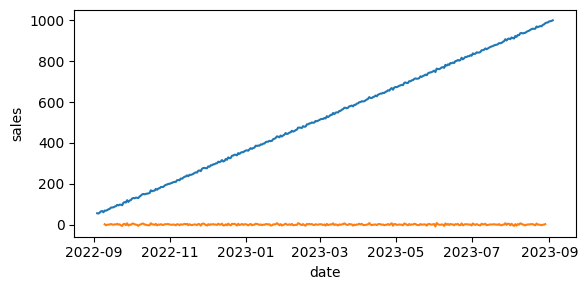

In [10]:
#variabilidad
residual = decomposition.resid

#grafica
fig, axis = plt.subplots(figsize = (6, 3))
sns.lineplot(data = ts)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

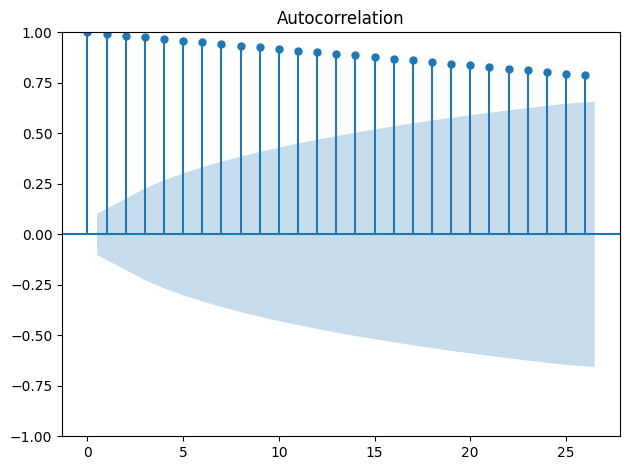

In [11]:
#autocorrelacion
plot_acf(ts)
plt.tight_layout()
plt.show() #si hay autocorrelacion, pero va disminuyendo

###ARIMA

In [12]:
#transformar la serie en estacionaria
#ts_stationary = ts.diff().dropna()
#test_stationarity(ts_stationary) #test positivo a estacionalidad

In [13]:
#modelo arima
model = auto_arima(ts, seasonal = False, trace = True, m = 12)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=5.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=3.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=6.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=2.81 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=2.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 23.554 seconds


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Tue, 19 Nov 2024   AIC                           1839.552
Time:                        00:55:29   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###predicciones

In [15]:
forecast = model.predict(60)
forecast

,0
2023-09-04 17:10:08.079328,1002.158148
2023-09-05 17:10:08.079328,1004.831669
2023-09-06 17:10:08.079328,1007.423289
2023-09-07 17:10:08.079328,1010.021630
2023-09-08 17:10:08.079328,1012.619419
2023-09-09 17:10:08.079328,1015.217254
2023-09-10 17:10:08.079328,1017.815084
2023-09-11 17:10:08.079328,1020.412915
2023-09-12 17:10:08.079328,1023.010746
2023-09-13 17:10:08.079328,1025.608577


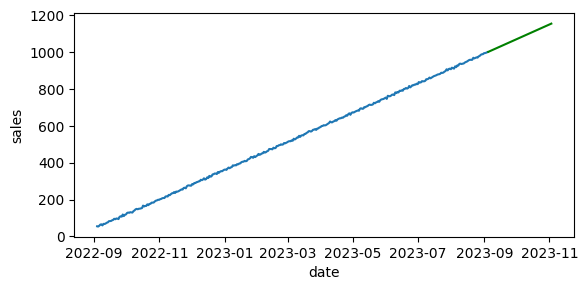

In [17]:
#grafica
fig, axis = plt.subplots(figsize = (6, 3))
sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")
plt.tight_layout()
plt.show()